In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import Adam
import gym
from rl.agents import eventDDPGAgent
from rl.memory import SequentialMemory

In [7]:
# GymのPendulum環境を作成
env = gym.make("Pendulum-v0")

# 取りうる”打ち手”のアクション数と値の定義
nb_actions = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [8]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [9]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

Training for 150000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 49s 5ms/step - reward: -2.6365
50 episodes - episode_reward: -527.291 [-1350.666, -205.195] - loss: 10.269 - mean_squared_error: 20.538 - mean_q: -53.941

Interval 2 (10000 steps performed)
 1261/10000 [==>...........................] - ETA: 46s - reward: -2.5615done, took 55.702 seconds


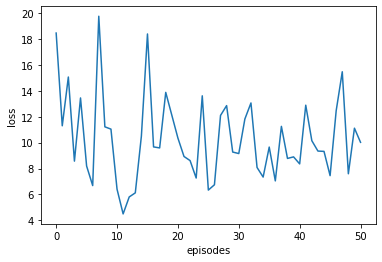

Finish Learning. We start test phase.


NameError: name 'aaa' is not defined

In [10]:
#event-base learning with time-based initial agent
l = 1.0
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])
a.load_weights('./1.0event-model.h5')
a.fit(env, lam=l, nb_steps=150000, visualize=0, verbose=1, nb_max_episode_steps=200, loss_graph=1)
print('Finish Learning. We start test phase.')
aaa
a.test(env, lam=l, nb_episodes=5, visualize=True, nb_max_episode_steps=200)
a.save_weights(f'learned_models/good{l}.h5')

Testing for 5 episodes ...
Episode 1: reward: -205.709, steps: 200


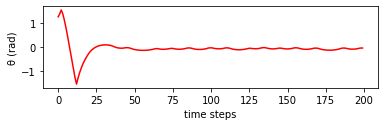

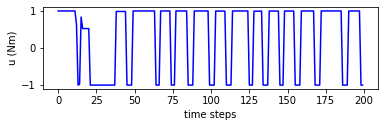

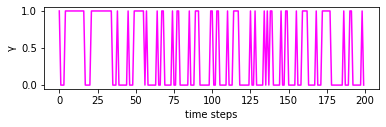

Episode 2: reward: -457.141, steps: 200


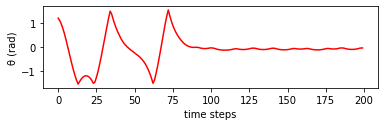

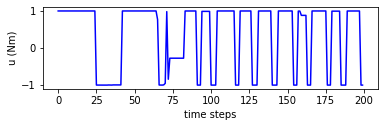

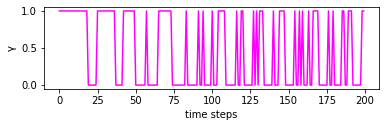

Episode 3: reward: -599.823, steps: 200


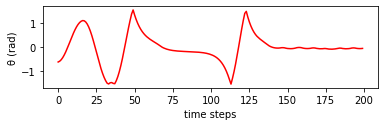

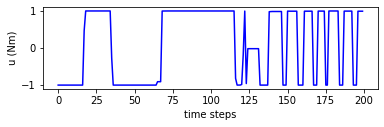

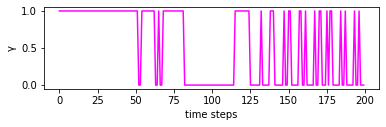

Episode 4: reward: -734.772, steps: 200


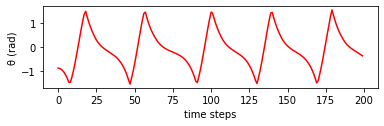

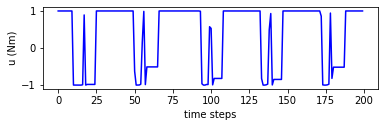

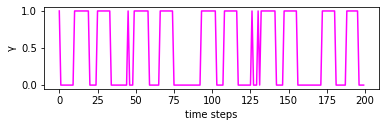

Episode 5: reward: -458.497, steps: 200


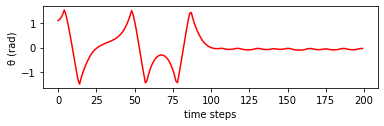

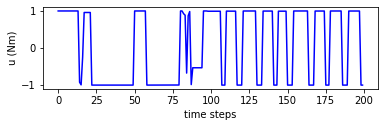

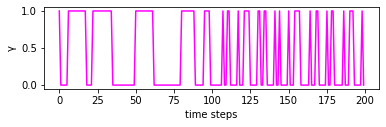

In [37]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

l = 1.0
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])
a.load_weights('./1.0event-model.h5')
a.test(env, lam=l, nb_episodes=5, visualize=0, nb_max_episode_steps=200, graph=True,action_view=0)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 55s 6ms/step - reward: -3.9847
done, took 55.141 seconds


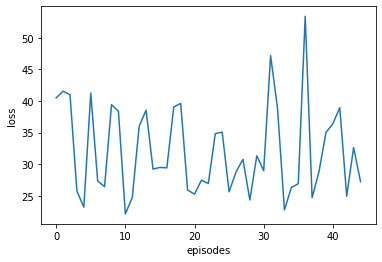

In [36]:
a.fit(env, lam=l, nb_steps=10000, visualize=0, verbose=1, nb_max_episode_steps=200, loss_graph=1)

Testing for 5 episodes ...
Episode 1: reward: -19.937, steps: 200


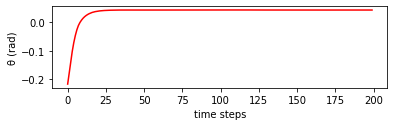

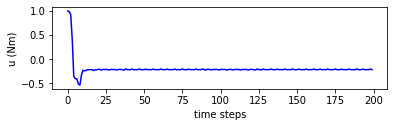

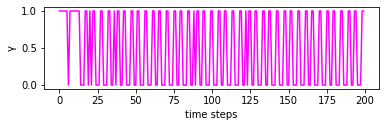

Episode 2: reward: -861.145, steps: 200


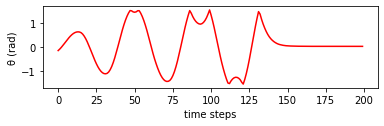

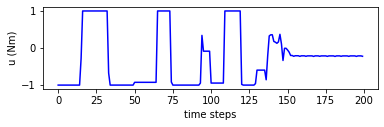

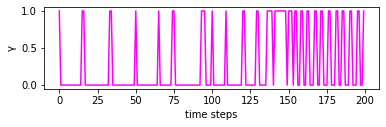

Episode 3: reward: -1154.588, steps: 200


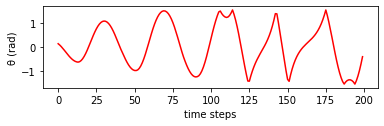

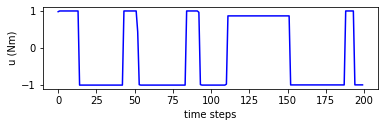

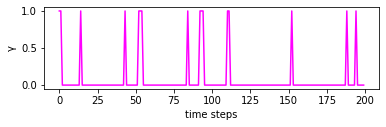

Episode 4: reward: -1118.710, steps: 200


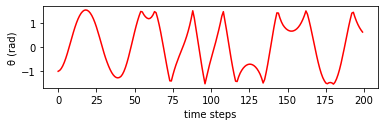

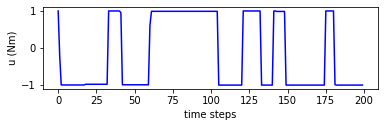

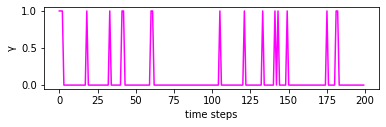

Episode 5: reward: -646.907, steps: 200


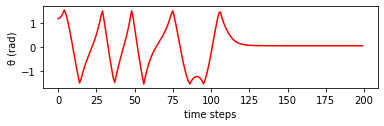

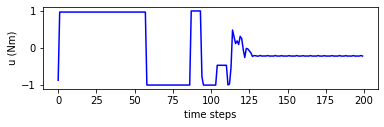

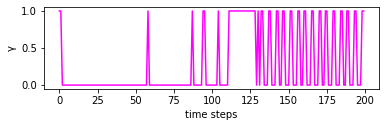

In [13]:
l = 0.8
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
#a.load_weights(f'./learned_models/good{l}.h5')
a.load_weights(f'./learned_models/normal{l}.h5')
a.test(env, lam=l, nb_episodes=5, visualize=True, nb_max_episode_steps=200, graph=1)

Testing for 1 episodes ...
step =  1 , output of actor network =  [ 0.9999989 -0.7795443 -0.9999991]
step =  2 , output of actor network =  [ 0.84119976 -0.9998244  -0.99999994]
step =  3 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  4 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  5 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  6 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  7 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  8 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  9 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  10 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  11 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  12 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step =  13 , output of actor network =  [-0.9999999 -0.9999993 -1.       ]
step

step =  116 , output of actor network =  [ 0.2217733  0.9999533 -0.999978 ]
step =  117 , output of actor network =  [ 0.23451369  0.99995244 -0.99997747]
step =  118 , output of actor network =  [ 0.23451369  0.99995244 -0.99997747]
step =  119 , output of actor network =  [ 0.23451369  0.99995244 -0.99997747]
step =  120 , output of actor network =  [ 0.22398253  0.9999531  -0.99997795]
step =  121 , output of actor network =  [ 0.22398253  0.9999531  -0.99997795]
step =  122 , output of actor network =  [ 0.22398253  0.9999531  -0.99997795]
step =  123 , output of actor network =  [ 0.22398253  0.9999531  -0.99997795]
step =  124 , output of actor network =  [ 0.22398253  0.9999531  -0.99997795]
step =  125 , output of actor network =  [ 0.23468438  0.99995244 -0.9999776 ]
step =  126 , output of actor network =  [ 0.23468438  0.99995244 -0.9999776 ]
step =  127 , output of actor network =  [ 0.23468438  0.99995244 -0.9999776 ]
step =  128 , output of actor network =  [ 0.22379406  

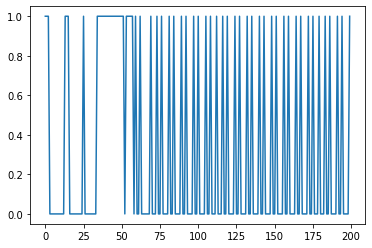

In [11]:
a.test(env, lam=l, nb_episodes=1, visualize=True, nb_max_episode_steps=200, graph=1, action_view=1)

W1009 18:32:28.364133 140735584400256 deprecation_wrapper.py:119] From /Users/admin/.pyenv/versions/3.6.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1009 18:32:28.388212 140735584400256 deprecation_wrapper.py:119] From /Users/admin/.pyenv/versions/3.6.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1009 18:32:28.407072 140735584400256 deprecation_wrapper.py:119] From /Users/admin/.pyenv/versions/3.6.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4158: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1009 18:32:28.529716 140735584400256 deprecation_wrapper.py:119] From /Users/admin/.pyenv/versions/3.6.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is de

Testing for 5 episodes ...
Episode 1: reward: -0.404, steps: 200


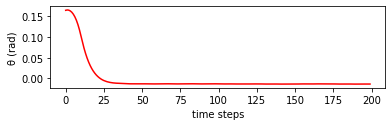

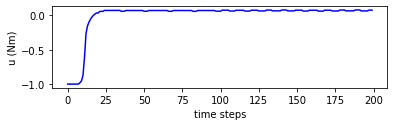

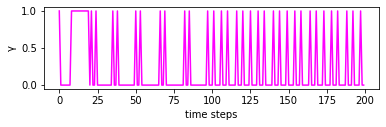

Episode 2: reward: -123.135, steps: 200


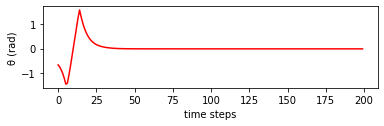

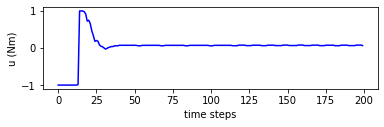

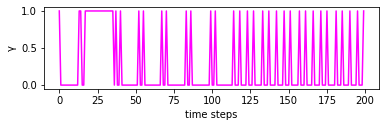

Episode 3: reward: -239.054, steps: 200


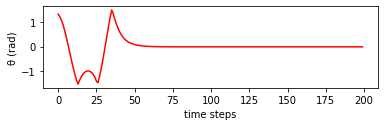

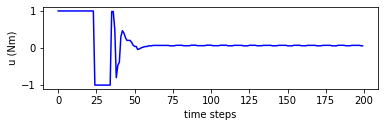

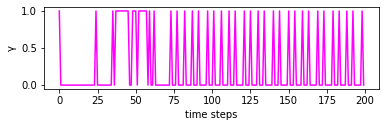

Episode 4: reward: -484.315, steps: 200


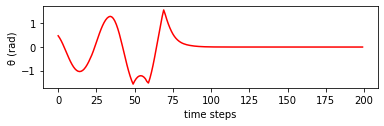

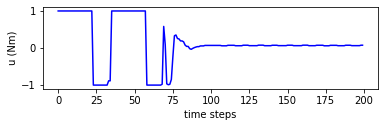

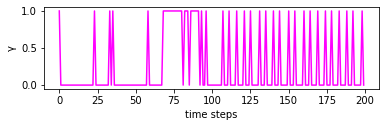

Episode 5: reward: -493.129, steps: 200


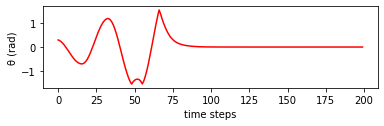

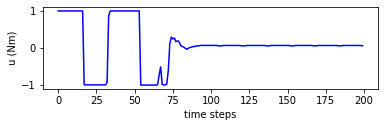

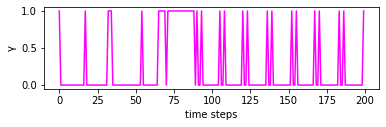

In [5]:
l = 0
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
a.load_weights('./learned_models/0.model.h5')
a.test(env, lam=l, nb_episodes=5, visualize=0, nb_max_episode_steps=200,graph=1)

Testing for 1 episodes ...
step =  1 , output of actor network =  [ 940.4695   483.00555 -366.91855]
step =  2 , output of actor network =  [ 860.20215  561.45807 -411.98712]
step =  3 , output of actor network =  [ 761.56616  654.6302  -465.692  ]
step =  4 , output of actor network =  [ 571.39734  772.54376 -531.1121 ]
step =  5 , output of actor network =  [ 232.91211  825.325   -646.49036]
step =  6 , output of actor network =  [-184.82008  837.3417  -770.9497 ]
step =  7 , output of actor network =  [-314.34958  830.44354 -767.7302 ]
step =  8 , output of actor network =  [-478.92856  856.05634 -760.9333 ]
step =  9 , output of actor network =  [-408.44138  894.9359  -709.1968 ]
step =  10 , output of actor network =  [-295.68332  932.6889  -652.5583 ]
step =  11 , output of actor network =  [-155.94226  937.71173 -604.06354]
step =  12 , output of actor network =  [  -3.324278  937.04016  -557.27155 ]
step =  13 , output of actor network =  [ 368.8251   936.89386 -437.80597]
step

step =  176 , output of actor network =  [ -284.1066    812.99774 -1309.9152 ]
step =  177 , output of actor network =  [ -405.33807   866.7494  -1217.7397 ]
step =  178 , output of actor network =  [ -509.07245   878.2232  -1143.4963 ]
step =  179 , output of actor network =  [ -496.6782    914.91437 -1064.588  ]
step =  180 , output of actor network =  [-351.7618   934.9423  -988.66724]
step =  181 , output of actor network =  [-163.37314  956.97626 -901.0909 ]
step =  182 , output of actor network =  [ 121.32251  982.7164  -791.32294]
step =  183 , output of actor network =  [ 920.5858  1037.6958  -672.74634]
step =  184 , output of actor network =  [1557.628    904.93097 -614.1343 ]
step =  185 , output of actor network =  [2055.686   838.8461 -549.8679]
step =  186 , output of actor network =  [2510.9417   723.03064 -501.64648]
step =  187 , output of actor network =  [2778.139   545.1213 -467.4404]
step =  188 , output of actor network =  [2696.8782   315.4022  -433.80984]
step =

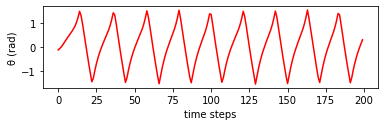

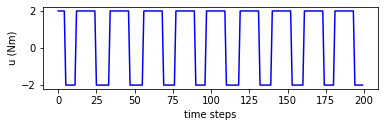

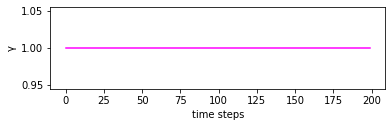

In [5]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="linear")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(32, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

l = 0.4
a =  agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mse"])
a.load_weights('./0.4free_model.h5')
a.test(env, lam=l, nb_episodes=1, visualize=0, nb_max_episode_steps=200, graph=1,action_view=1)

In [38]:
a.save_weights('1.0eventmodel.h5')